In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/raw.csv")

In [3]:
df.head()

,_id,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,64f61b3e5bd88f2233bf5ded,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,64f61b3e5bd88f2233bf5dee,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,64f61b3e5bd88f2233bf5def,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,64f61b3e5bd88f2233bf5df0,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,64f61b3e5bd88f2233bf5df1,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.columns

Index(['_id', 'Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.shape

(1000, 10)

In [6]:
df.isnull().sum()

_id                 0
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               1000 non-null   object
 1   Transaction ID    1000 non-null   int64 
 2   Date              1000 non-null   object
 3   Customer ID       1000 non-null   object
 4   Gender            1000 non-null   object
 5   Age               1000 non-null   int64 
 6   Product Category  1000 non-null   object
 7   Quantity          1000 non-null   int64 
 8   Price per Unit    1000 non-null   int64 
 9   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

_id                 1000
Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [10]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
print("The categories in Gender are : ", end = " ")
print(df['Gender'].unique())

print("The categories in Product Category  are : ", end = " ")
print(df['Product Category'].unique())


The categories in Gender are :  ['Male' 'Female']
The categories in Product Category  are :  ['Beauty' 'Clothing' 'Electronics']


In [12]:
# define categorical and numerical features

categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

print(f"We have {len(numerical_feature)} numerical features : {numerical_feature}")
print(f"We have {len(categorical_feature)} categorical features : {categorical_feature}")

We have 5 numerical features : ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']
We have 5 categorical features : ['_id', 'Date', 'Customer ID', 'Gender', 'Product Category']


## Exploring Data (Visualization)

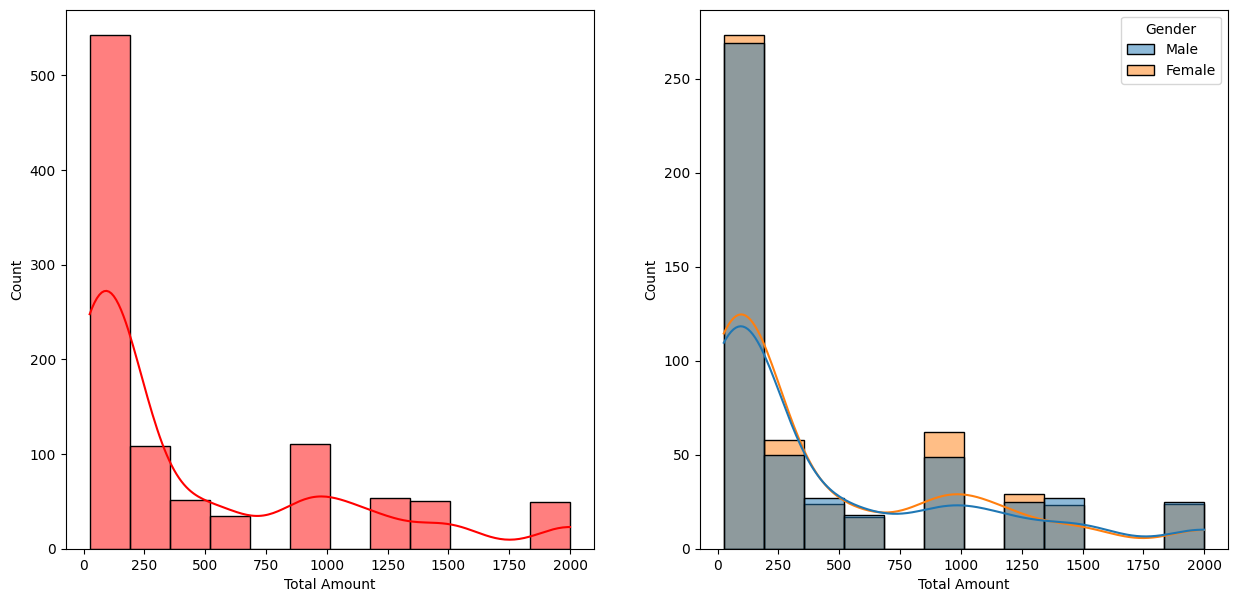

In [13]:
fig, ax = plt.subplots(1,2,figsize = (15,7))
sns.histplot(data = df, x = 'Total Amount', kde = True, color = 'r', ax = ax[0] )
sns.histplot(data = df, x = 'Total Amount', kde = True, hue = 'Gender' , ax = ax[1] )
plt.show()

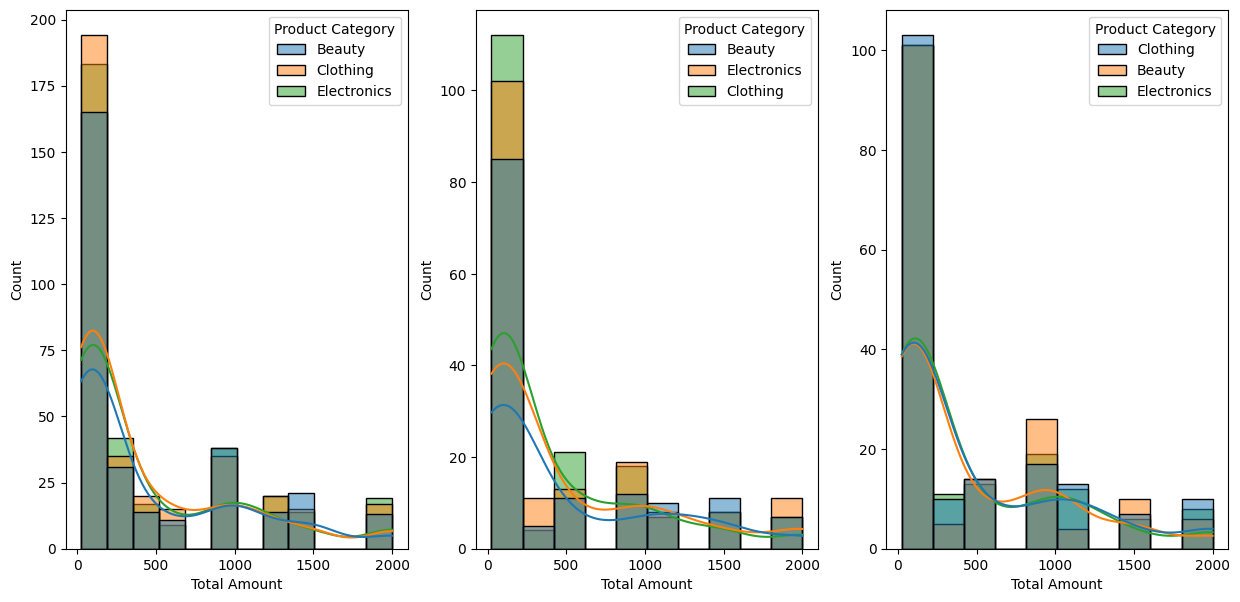

In [14]:
fig, ax = plt.subplots(1,3,figsize = (15,7))
sns.histplot(data = df, x = 'Total Amount', kde = True, hue = 'Product Category' , ax = ax[0] )
sns.histplot(data = df[df['Gender']=='Male'], x = 'Total Amount', kde = True, hue = 'Product Category' , ax = ax[1] )
sns.histplot(data = df[df['Gender']=='Female'], x = 'Total Amount', kde = True, hue = 'Product Category' , ax = ax[2] )
plt.show()

In [15]:
df.drop(columns=['_id','Transaction ID', 'Customer ID' ], inplace= True)

In [23]:
df['Year'] = df['Date'].str.split("-").str[0]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Date'].str.split("-").str[1]
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Date'].str.split("-").str[2]
df['Day'] = df['Day'].astype(int)

In [26]:
df.drop(columns='Date', inplace=True)

In [27]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
0,Male,34,Beauty,3,50,150,2023,11,24
1,Female,26,Clothing,2,500,1000,2023,2,27
2,Male,50,Electronics,1,30,30,2023,1,13
3,Male,37,Clothing,1,500,500,2023,5,21
4,Male,30,Beauty,2,50,100,2023,5,6


<Axes: xlabel='Total Amount', ylabel='Count'>

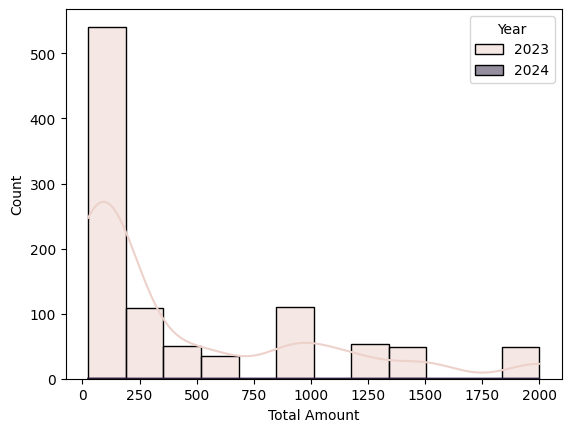

In [28]:
sns.histplot(data =df, x = 'Total Amount', kde = True, hue = 'Year')

In [30]:
df[df['Year'] == 2024]

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
210,Male,42,Beauty,3,500,1500,2024,1,1
649,Male,55,Electronics,1,30,30,2024,1,1


Text(0.5, 0, 'Month')

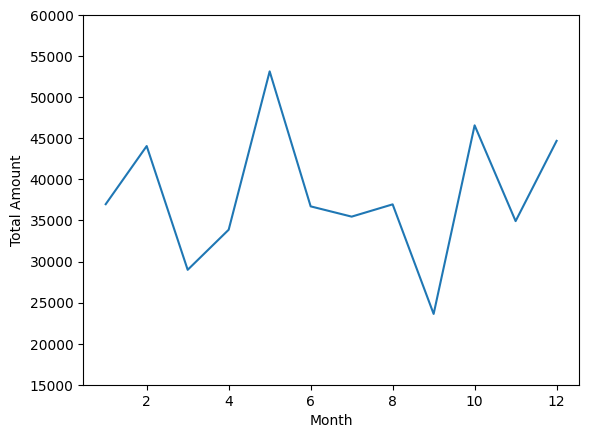

In [62]:
data = df.groupby(df['Month']).sum().reset_index()
Month_data = data[['Total Amount','Month']]

sns.lineplot(data=Month_data, x= Month_data['Month'], y = Month_data['Total Amount'])
plt.ylim(15000,60000)
plt.xlabel("Month")


<Axes: xlabel='Day', ylabel='Total Amount'>

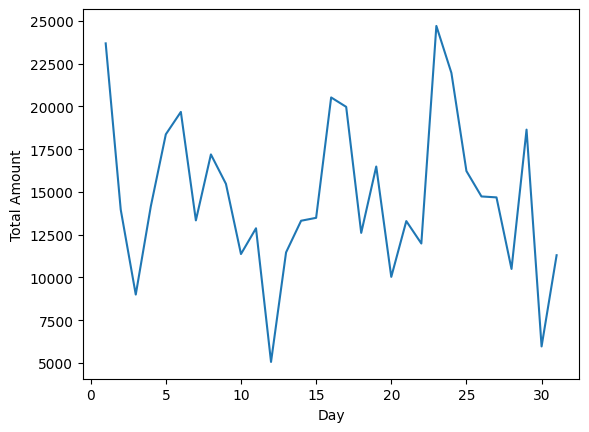

In [63]:
data_1 = df.groupby(df['Day']).sum().reset_index()
Day_data = data_1[['Total Amount','Day']]

sns.lineplot(data=Day_data, x= Day_data['Day'], y = Day_data['Total Amount'])


<Axes: xlabel='Age', ylabel='Total Amount'>

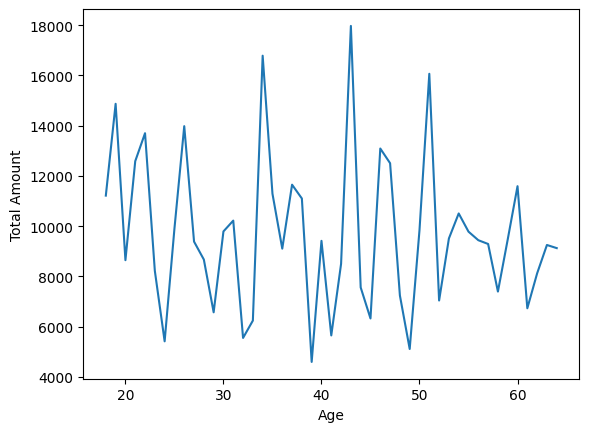

In [64]:
data_2 = df.groupby(df['Age']).sum().reset_index()
Age_data = data_2[['Total Amount','Age']]

sns.lineplot(data=Age_data, x= Age_data['Age'], y = Age_data['Total Amount'])

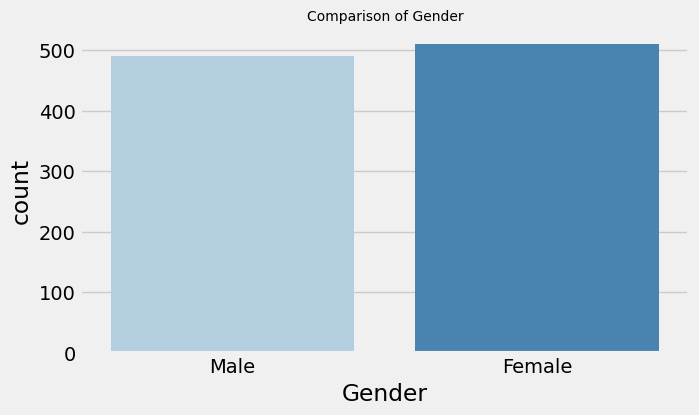

In [71]:
plt.rcParams['figure.figsize'] = (7,4)
plt.style.use('fivethirtyeight')
sns.countplot(x = df['Gender'], palette = 'Blues')
plt.title('Comparison of Gender', fontweight = 15, fontsize = 10)
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

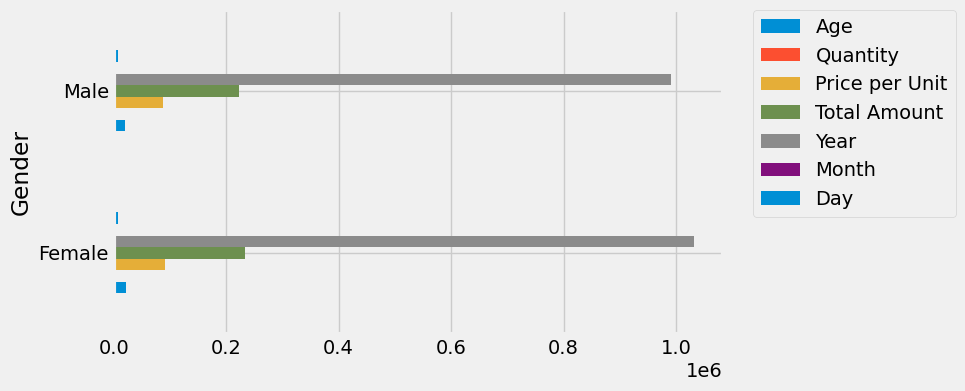

In [80]:
df.groupby('Gender').sum().plot(kind='barh')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

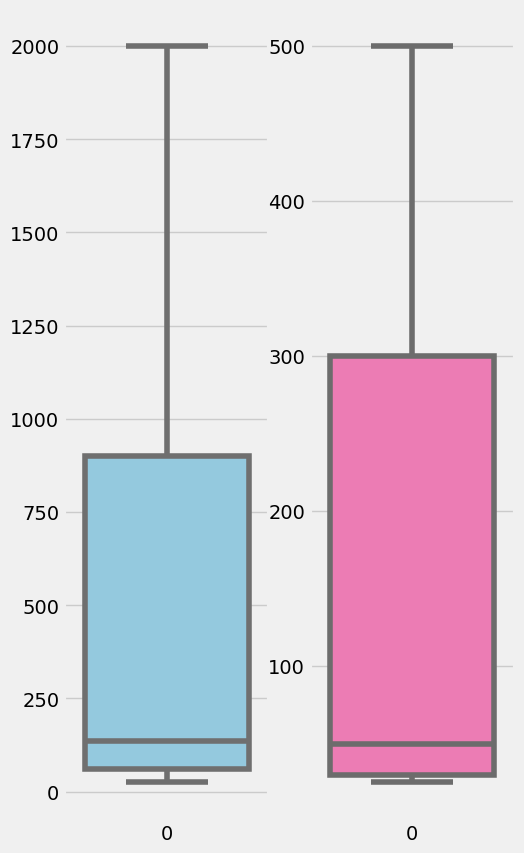

In [85]:
plt.subplots(1,2,figsize=(8,10))
plt.subplot(131)
sns.boxplot(df['Total Amount'],color='skyblue')
plt.subplot(132)
sns.boxplot(df['Price per Unit'],color='hotpink')

plt.show()

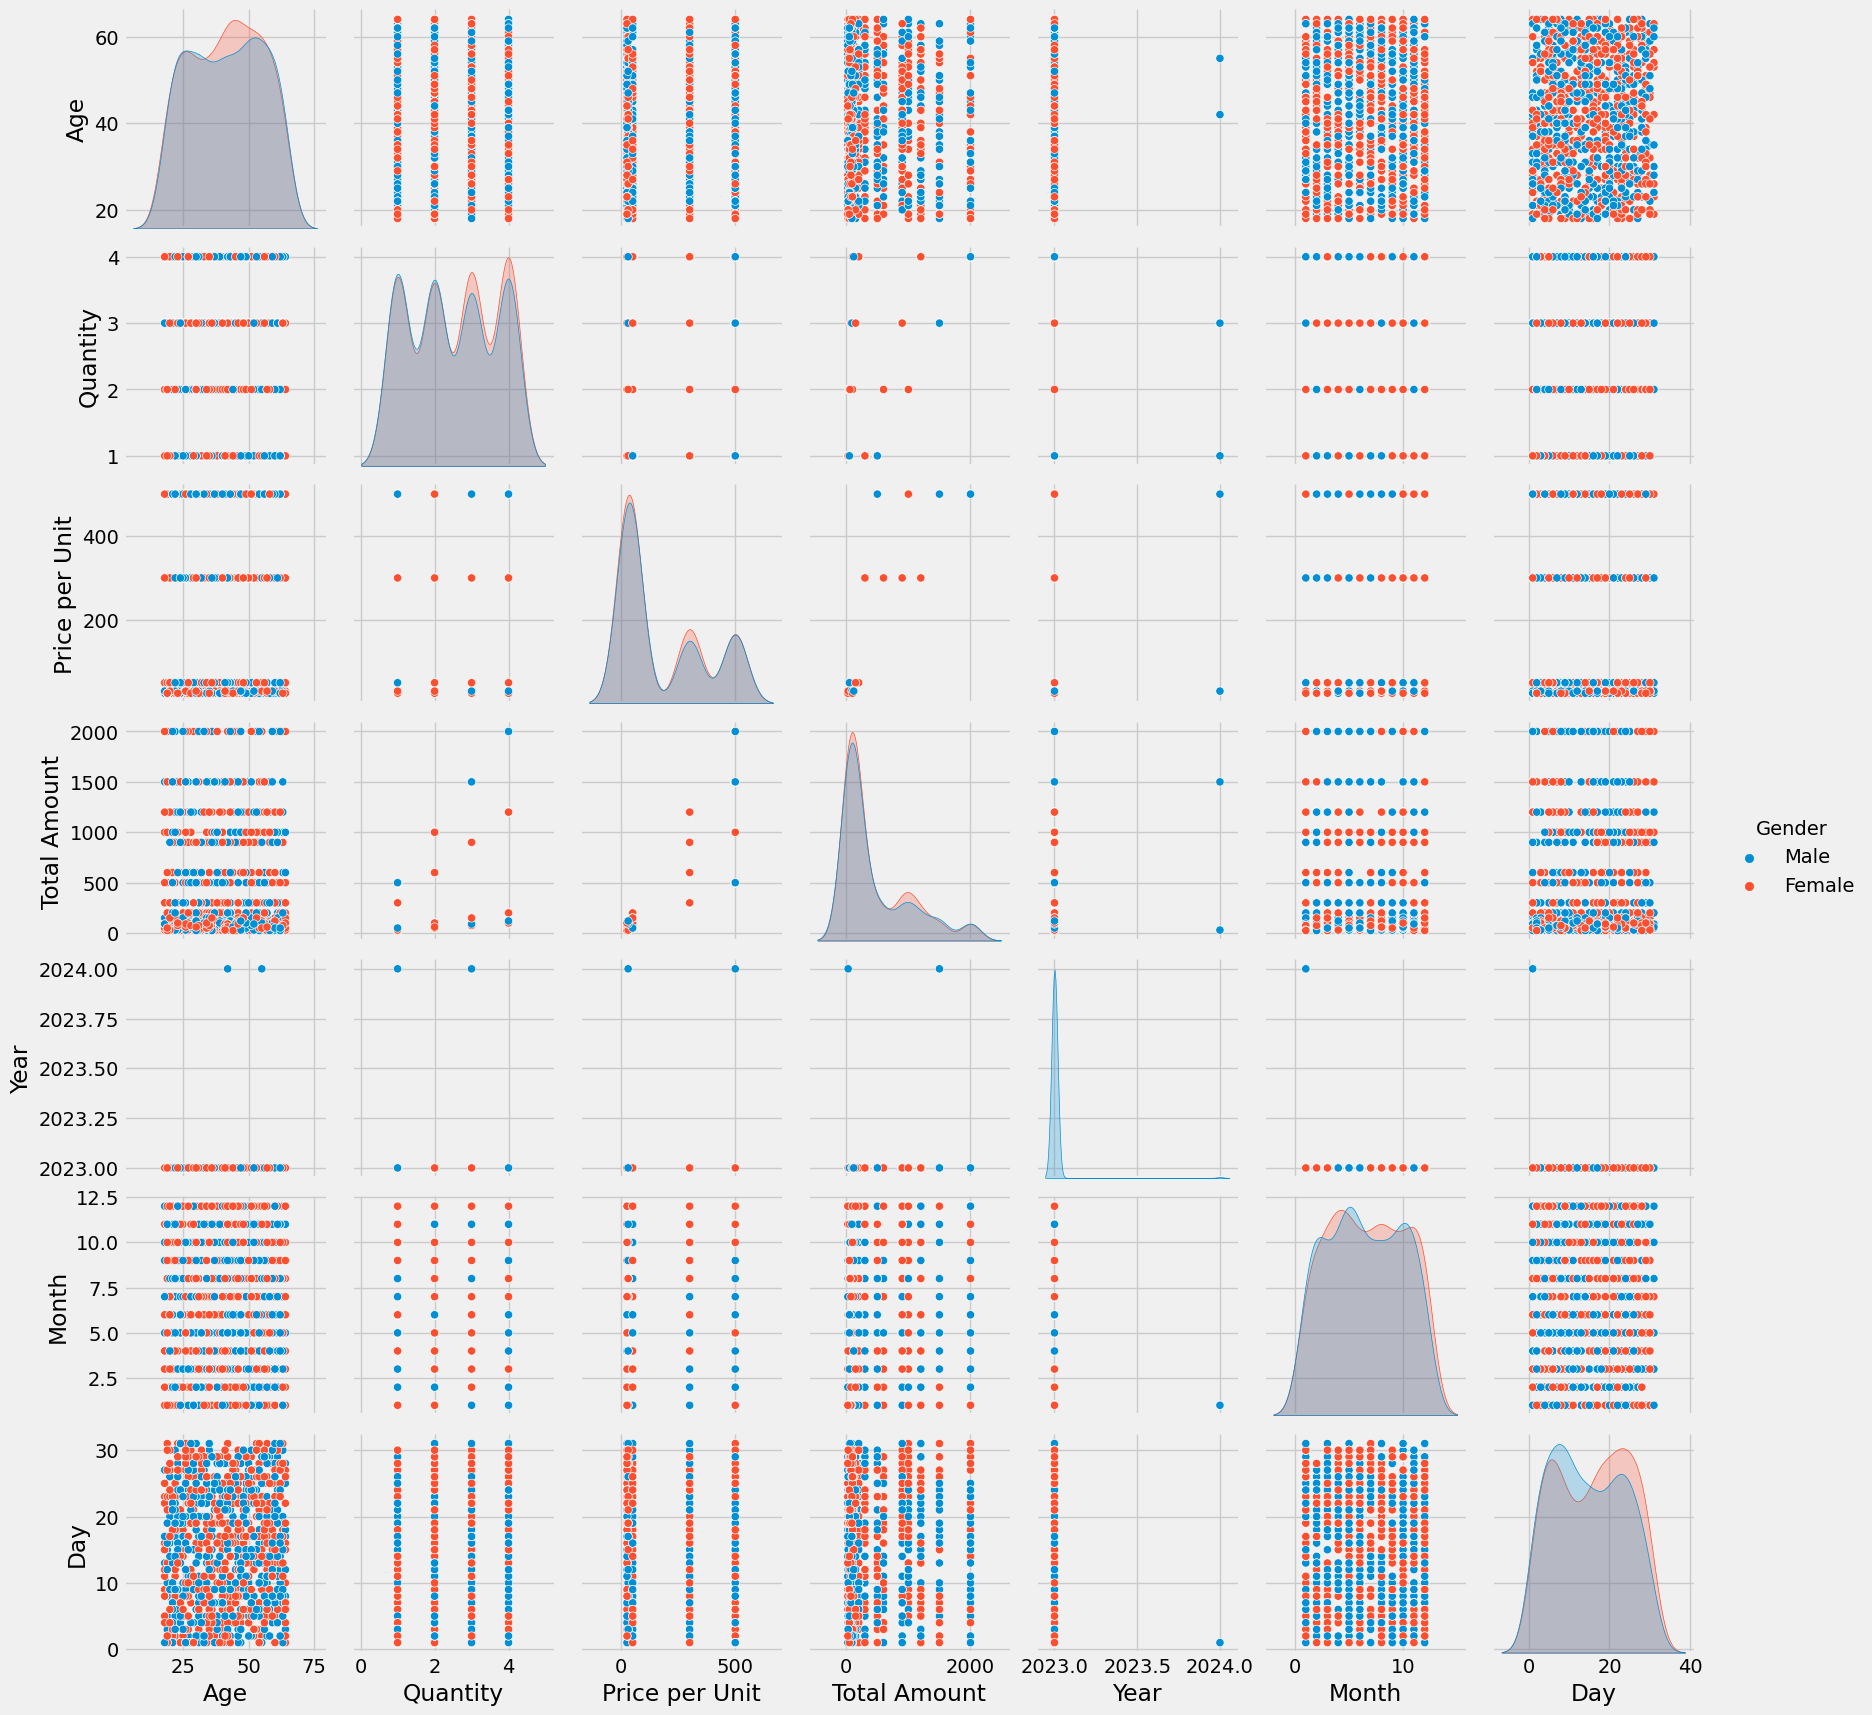

In [86]:

sns.pairplot(df,hue = 'Gender')
plt.show()